In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#WELCOME
In this Assignment, you'll use **Classifier** to predict the output. You are allowed to write/edit between the
```# START CODE HERE``` & ```# END CODE HERE``` only.<br>
Don't edit the test cells otherwise you'd be failed in the assignment.

Upload the ```utils.zip``` file before running the 1st cell.
[Demo](https://drive.google.com/file/d/1ebkQR6ikjGottmxa5KL83ZWdjTLvRxbm/view?usp=share_link)

**BEST OF LUCK**

**RUN THIS CODE TO UNIZP THE REQUIRED FILES**

In [3]:
!unzip -j /content/drive/MyDrive/utils.zip -d.

Archive:  /content/drive/MyDrive/utils.zip
  inflating: ./weather_classification_data.csv  
  inflating: ./data_scaled_labeled_check.csv  


# Dataset Loading and Pre-Processing

In [4]:
import pandas as pd
data = pd.read_csv("/content/weather_classification_data.csv")

## Data Info
```data.info``` gives info about data-types and number of null objects.  
There are no null data, no need to remove any.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Data Shuffling
Data Shuffling removes any bias present and creates uniform distribution.

In [6]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
5832,23.0,64,15.5,98.0,partly cloudy,1003.88,0,Spring,2.5,coastal,Rainy
6449,14.0,69,14.5,16.0,overcast,1013.48,3,Winter,6.5,mountain,Cloudy
13109,-3.0,84,16.0,99.0,overcast,981.41,1,Winter,2.0,inland,Snowy
11867,25.0,58,6.5,45.0,partly cloudy,1014.90,4,Autumn,8.5,coastal,Cloudy
7996,-22.0,86,1.5,76.0,overcast,999.48,1,Winter,1.0,inland,Snowy


## Scaling and Labeling
Machine can't understand string so all the object datatypes need to be LABELED with integers.<br><br>
Why SCALING?<br>
You might have noticed one column contains data with large values (of order 1000) whereas some column contain small value data (of order 10). As a result, large value columns get more power/importance than others. To remove this disparity we scaled them to same order/values.

**CODE**

We need to find the columns with object datatypes.

HINT: Use ```data.select_dtypes().columns.tolist()```<br>Reference: [w3schools](https://www.w3schools.com/python/pandas/ref_df_select_dtypes.asp#:~:text=The%20select_dtypes()%20method%20returns,the%20specified%20dtype(s).&text=Note%3A%20You%20must%20specify%20at,you%20will%20get%20an%20error.)

In [7]:
# START CODE HERE
object_columns = data.select_dtypes(include=['object']).columns.tolist()
non_object_columns = data.select_dtypes(exclude=['object']).columns.tolist()
# END CODE HERE
print(f"Object Columns: {object_columns}\nNon Object Columns: {non_object_columns}")

Object Columns: ['Cloud Cover', 'Season', 'Location', 'Weather Type']
Non Object Columns: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


**TEST** (DON'T EDIT THIS CELL)

In [8]:
# DON'T EDIT THIS CELL
if (object_columns == ['Cloud Cover', 'Season', 'Location', 'Weather Type'] and non_object_columns == ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']):
  print(f"\033[32mTest Passed\033[0m")
else:
  print(f"\033[31mTest Failed\033[0m")

Test Passed


**CODE**

We need to convert the object-type columns data into integral labels and scale the non-object-type columns data.

HINT: Use ```ColumnTransformer()```<br>Reference: [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), [ChatGPT](https://chatgpt.com/c/7f3c1b02-5da0-4c34-bdb2-d999dccb9c2f)

In [9]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# START CODE HERE

column_transformer = ColumnTransformer(
    transformers=[
        ('obj', OrdinalEncoder(), object_columns),
        ('num', StandardScaler(), non_object_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the data
data_scaled_labeled = column_transformer.fit_transform(data)

# END CODE HERE

all_columns = object_columns + non_object_columns

# Create the new DataFrame
data_scaled_labeled = pd.DataFrame(data_scaled_labeled, columns=all_columns)

**TEST** (DON'T EDIT THIS CELL)

In [10]:
# DON'T EDIT THIS CELL

data_scaled_labeled_check = pd.read_csv("/content/data_scaled_labeled_check.csv")
import numpy as np
data_scaled_labeled_values = np.sort(data_scaled_labeled.values,axis=0)
data_scaled_labeled_check_values = np.sort(data_scaled_labeled_check.values,axis=0)
if np.allclose(data_scaled_labeled_values, data_scaled_labeled_check_values, equal_nan=True):
  print(f"\033[32mTest Passed\033[0m")
else:
  print(f"\033[31mTest Failed\033[0m")

Test Passed


## Data Splitting

**CODE**

We need to drop the Weather Type column from data_scaled_labeled to get the X and pick Weather Type column to get Y

Use 90-10 split of data, i.e. 90% for training, 10% for testing

In [11]:
X = data_scaled_labeled.drop(columns=['Weather Type'])
y = data_scaled_labeled['Weather Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, random_state = 10)

**TEST** (DON'T EDIT THIS CELL)

In [12]:
# DON'T EDIT THIS CELL

if (len(X_train)==11880 and len(X_test)==1320):
  print(f"\033[32mTest Passed\033[0m")
else:
  print(f"\033[31mTest Failed\033[0m")

if (len(y_train)==11880 and len(y_test)==1320):
  print(f"\033[32mTest Passed\033[0m")
else:
  print(f"\033[31mTest Failed\033[0m")

Test Passed
Test Passed


In [13]:
X_train.head()

,Cloud Cover,Season,Location,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
7017,3.0,1.0,1.0,-0.179894,0.905696,0.748042,1.325878,-0.011772,-0.260799,-1.027154
12278,2.0,3.0,1.0,-1.330267,0.063841,-0.554712,0.574594,-0.626049,-1.038715,-0.285616
2859,0.0,1.0,0.0,1.315591,-1.174182,-0.699463,-1.334918,0.475349,1.813646,0.604230
5495,3.0,1.0,2.0,-0.007338,1.400906,0.024290,1.200664,0.106513,-0.520104,-0.878846
8469,3.0,2.0,0.0,-0.352450,0.509529,-0.699463,-0.740152,-0.006127,-0.520104,1.049153


# Training and Testing
Use any suitable classifier to fit the training data and check the accuracy on test data

Don't forget to import that library

**CODE**

ACCURACY should be more than 90%,

1. Fit the model to X_train and y_train
2. Find the model score on X_test and y_test

In [25]:
# START CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'random_state': 42
}

model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

# END CODE HERE

print("Accuracy:", score*100)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 93.18181818181817


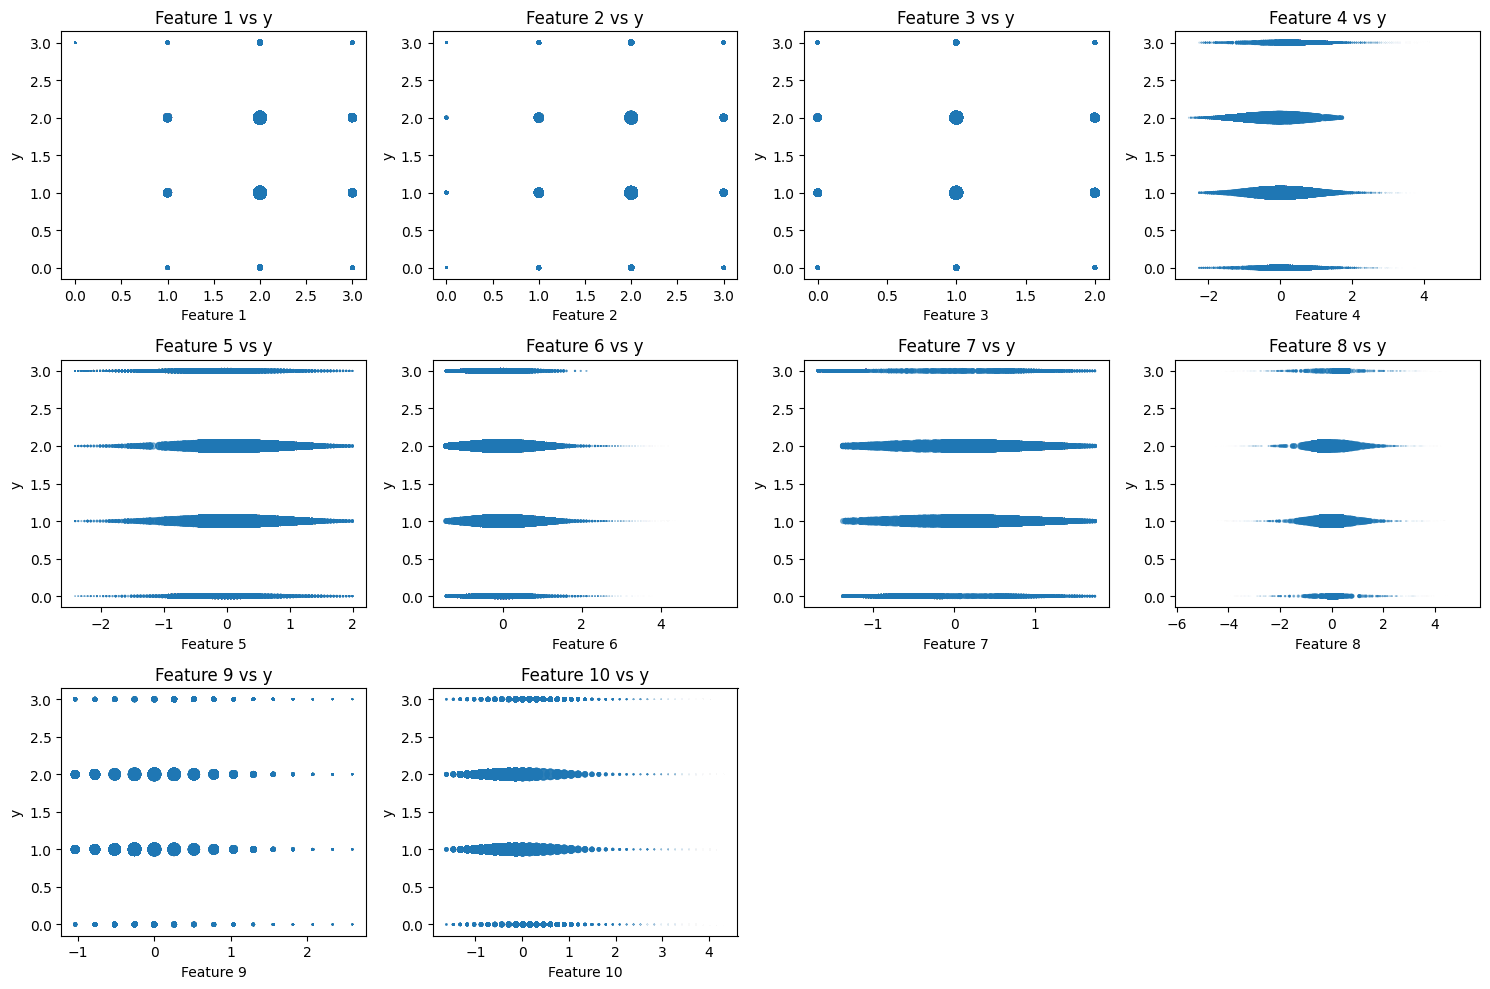

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Number of features
num_features = X.shape[1]

# Function to calculate point sizes based on density
def calculate_point_sizes(x, y):
    # Calculate point sizes based on a density estimate
    xy = np.vstack([x, y])
    z = np.zeros_like(x)
    z += np.exp(-((xy - xy.mean(axis=1)[:, np.newaxis])**2).sum(axis=0))
    return z * 100

# Plotting each feature against y with adjusted point sizes
plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as per the number of features

    # Calculate point sizes
    sizes = calculate_point_sizes(X.iloc[:, i], y)

    plt.scatter(X.iloc[:, i], y, s=sizes, alpha=0.5)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'Feature {i+1} vs y')

plt.tight_layout()
plt.show()


**TEST** (DON'T EDIT THIS CELL)

In [21]:
# DON'T EDIT THIS CELL

if (score>0.90):
  print(f"\033[32mTest Passed\033[0m")
else:
  print(f"\033[31mTest Failed\033[0m")

Test Passed


# Predicting Output (Here, Weather Type) (Optional)

In [22]:
input = X_test.head()
input

,Cloud Cover,Season,Location,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
11923,3.0,0.0,1.0,0.567848,-0.530410,-0.337587,-1.272311,0.100599,-0.520104,0.900845
2331,3.0,3.0,2.0,-0.064857,-0.678973,-0.482337,-1.053187,0.004089,-0.260799,0.900845
217,3.0,0.0,0.0,0.222737,-2.115080,-0.192836,-1.397525,0.562181,1.295035,0.604230
1760,0.0,2.0,1.0,0.912960,-2.362685,-1.133714,-1.397525,0.191464,0.776424,0.604230
3963,0.0,1.0,0.0,0.107699,-0.332327,-0.699463,-1.084490,0.606269,0.776424,1.197460


In [26]:
y = model.predict(input)
y

array([0., 0., 3., 3., 3.])

Here, the outputs are in numbers. We can perform inverse column transfer for getiing the string values.
